In [1]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
# AlexNet
model = models.Sequential()
    # 使用步长为4x4，大小为11的卷积核对图像进行卷积，输出的特征层为96层，输出的shape为(55,55,96)；
    # 所建模型后输出为48特征层
model.add(
    Conv2D(
        filters=48, 
        kernel_size=(11,11),
        strides=(4,4),
        padding='valid',
        input_shape=(150,150,3),
        name="cov_1",
        activation='relu'
    )
)
    
model.add(BatchNormalization())
    # 使用步长为2的最大池化层进行池化，此时输出的shape为(27,27,96)
    # 所建模型后输出为48特征层
model.add(
    MaxPooling2D(
        pool_size=(3,3), 
        strides=(2,2), 
        padding='valid'
    )
)
    # 使用步长为1x1，大小为5的卷积核对图像进行卷积，输出的特征层为256层，输出的shape为(27,27,256)；
    # 所建模型后输出为128特征层
model.add(
    Conv2D(
        filters=128, 
        kernel_size=(5,5), 
        strides=(1,1), 
        padding='same',
        activation='relu'
    )
)
    
model.add(BatchNormalization())
    # 使用步长为2的最大池化层进行池化，此时输出的shape为(13,13,256)；
    # 所建模型后输出为128特征层
model.add(
    MaxPooling2D(
        pool_size=(3,3),
        strides=(2,2),
        padding='valid'
    )
)
    # 使用步长为1x1，大小为3的卷积核对图像进行卷积，输出的特征层为384层，输出的shape为(13,13,384)；
    # 所建模型后输出为192特征层
model.add(
    Conv2D(
        filters=192, 
        kernel_size=(3,3),
        strides=(1,1), 
        padding='same', 
        activation='relu'
    )
) 
    # 使用步长为1x1，大小为3的卷积核对图像进行卷积，输出的特征层为384层，输出的shape为(13,13,384)；
    # 所建模型后输出为192特征层
model.add(
    Conv2D(
        filters=192, 
        kernel_size=(3,3), 
        strides=(1,1), 
        padding='same', 
        activation='relu'
    )
)
    # 使用步长为1x1，大小为3的卷积核对图像进行卷积，输出的特征层为256层，输出的shape为(13,13,256)；
    # 所建模型后输出为128特征层
model.add(
    Conv2D(
        filters=128, 
        kernel_size=(3,3), 
        strides=(1,1), 
        padding='same', 
        activation='relu'
    )
)
    # 使用步长为2的最大池化层进行池化，此时输出的shape为(6,6,256)；
    # 所建模型后输出为128特征层
model.add(
    MaxPooling2D(
        pool_size=(3,3), 
        strides=(2,2), 
        padding='valid'
    )
)
    # 两个全连接层，最后输出为1000类,这里改为2类（猫和狗）
    # 缩减为1024
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
    
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
    
    
model.add(Dense(1, activation='sigmoid'))
    
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cov_1 (Conv2D)               (None, 35, 35, 48)        17472     
_________________________________________________________________
batch_normalization (BatchNo (None, 35, 35, 48)        192       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 17, 17, 48)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 17, 17, 128)       153728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 17, 17, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 192)         2

In [2]:
from tensorflow import optimizers
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(learning_rate=1e-4),
 metrics=['acc'])

In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
 'C:\\Users\\free_dreamer\\py\\cat_and_dog\\train', 
 target_size=(150, 150), 
 batch_size=20,
 class_mode='binary') 
validation_generator = test_datagen.flow_from_directory(
 'C:\\Users\\free_dreamer\\py\\cat_and_dog\\validation',
 target_size=(150, 150),
 batch_size=20,
 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
for data_batch, labels_batch in train_generator:
        print('data batch shape:', data_batch.shape)
        print('labels batch shape:', labels_batch.shape)
        break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [5]:
history = model.fit_generator(
 train_generator,
 steps_per_epoch=100,
 epochs=30,
 validation_data=validation_generator,
 validation_steps=50)

D:\Users\free_dreamer\miniconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 10s 42ms/step - loss: 0.7012 - acc: 0.5985 - val_loss: 0.6996 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 3s 31ms/step - loss: 0.6366 - acc: 0.6590 - val_loss: 0.7343 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 3s 30ms/step - loss: 0.6080 - acc: 0.6825 - val_loss: 0.7521 - val_acc: 0.5030
Epoch 4/30
100/100 [==============================] - 3s 30ms/step - loss: 0.5363 - acc: 0.7395 - val_loss: 0.6328 - val_acc: 0.6490
Epoch 5/30
100/100 [==============================] - 3s 30ms/step - loss: 0.4772 - acc: 0.7660 - val_loss: 0.6300 - val_acc: 0.6540
Epoch 6/30
100/100 [==============================] - 3s 30ms/step - loss: 0.3926 - acc: 0.8165 - val_loss: 0.8678 - val_acc: 0.6110
Epoch 7/30
100/100 [==============================] - 3s 30ms/step - loss: 0.3234 - acc: 0.8575 - val_loss: 0.6380 - val_acc: 0.7160
Epoch 8/30
100/100 [==============================] - 3s 30ms/step -

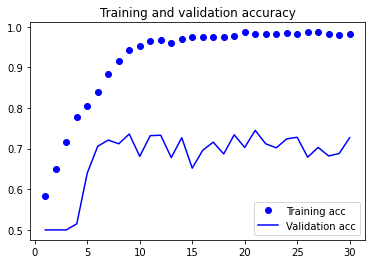

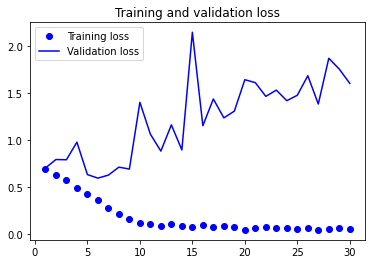

In [51]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

(1, 150, 150, 3)


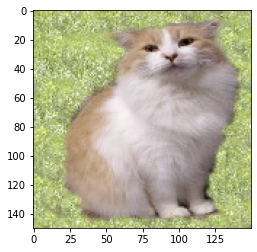

In [6]:
img_path = 'C:\\Users\\free_dreamer\\py\\cat_and_dog\\test\\cats\\cat.1600.jpg' 
 
from keras.preprocessing import image   
import numpy as np 
 
img = image.load_img(img_path, target_size=(150, 150))  
img_tensor = image.img_to_array(img) 
img_tensor = np.expand_dims(img_tensor, axis=0)  
img_tensor /= 255.   
 
# 其形状为 (1, 150, 150, 3) 
print(img_tensor.shape)
import matplotlib.pyplot as plt 
 
plt.imshow(img_tensor[0]) 
plt.show()

In [53]:
x=model.predict(img_tensor)
print(x)

[[0.01202325]]


[[1.]]


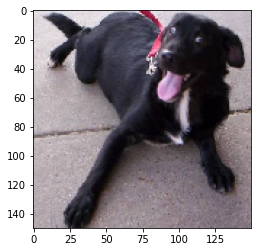

In [54]:
img_path = 'C:\\Users\\free_dreamer\\py\\cat_and_dog\\test\\dogs\\dog.1700.jpg' 
 
from keras.preprocessing import image   
import numpy as np 
 
img = image.load_img(img_path, target_size=(150, 150))  
img_tensor = image.img_to_array(img) 
img_tensor = np.expand_dims(img_tensor, axis=0)  
img_tensor /= 255.   
x=model.predict(img_tensor)
print(x)
import matplotlib.pyplot as plt 
 
plt.imshow(img_tensor[0]) 
plt.show()

In [7]:
from keras.models import Model 
cov1_layer_model = Model(inputs=model.input,outputs=model.get_layer('cov_1').output)
cov1_output = cov1_layer_model.predict(img_tensor)

print (cov1_output.shape)


(1, 35, 35, 48)


In [11]:
print(cov1_output[0][1][1])

[0.         0.         0.34198833 0.06433921 0.06348897 0.17696628
 0.         0.09813599 0.         0.         0.23787826 0.
 0.2780322  0.04920385 0.06457245 0.44123507 0.         0.0534949
 0.06593929 0.         0.09672864 0.0370094  0.         0.30824727
 0.         0.4748682  0.04423274 0.         0.         0.
 0.         0.48977417 0.         0.         0.4119559  0.18932998
 0.69637275 0.         0.         0.         0.         0.
 0.         0.02373465 0.         0.11159417 0.03174128 0.22593963]


In [14]:
out=open("data.out","w")

In [16]:
print(cov1_output[0][1][1],file=out)
out.close()

In [18]:
a=cov1_output[0][1][1][2]
b=a+1
print(b)

1.3419883251190186


In [69]:
c=numpy.zeros((64,10000))

In [70]:
fnames = ['D:\\学习\\深度学习\\dogs-vs-cats\\train\\train\\cat.{}.jpg'.format(i) for i in range(0, 9999)]
k=0
for fname in fnames:
    img = image.load_img(fname, target_size=(150, 150))  
    img_tensor = image.img_to_array(img) 
    img_tensor = np.expand_dims(img_tensor, axis=0)  
    img_tensor /= 255.   
    x=model.predict(img_tensor)
    cov1_layer_model = Model(inputs=model.input,outputs=model.get_layer('cov_1').output)
    cov1_output = cov1_layer_model.predict(img_tensor)
    c[0][k]=cov1_output[0][0][0][0]
    c[1][k]=cov1_output[0][0][1][0]
    c[2][k]=cov1_output[0][0][2][0]
    c[3][k]=cov1_output[0][0][3][0]
    c[4][k]=cov1_output[0][1][0][0]
    c[5][k]=cov1_output[0][1][1][0]
    c[6][k]=cov1_output[0][1][2][0]
    c[7][k]=cov1_output[0][1][3][0]
    c[8][k]=cov1_output[0][2][0][0]
    c[9][k]=cov1_output[0][2][1][0]
    c[10][k]=cov1_output[0][2][2][0]
    c[11][k]=cov1_output[0][2][3][0]
    c[12][k]=cov1_output[0][3][0][0]
    c[13][k]=cov1_output[0][3][1][0]
    c[14][k]=cov1_output[0][3][2][0]
    c[15][k]=cov1_output[0][3][3][20]
    c[16][k]=cov1_output[0][20][20][20]
    c[17][k]=cov1_output[0][0][11][20]
    c[18][k]=cov1_output[0][0][21][20]
    c[19][k]=cov1_output[0][15][3][0]
    c[20][k]=cov1_output[0][16][0][0]
    c[21][k]=cov1_output[0][17][1][0]
    c[22][k]=cov1_output[0][18][21][0]
    c[23][k]=cov1_output[0][19][23][0]
    c[24][k]=cov1_output[0][2][10][0]
    c[25][k]=cov1_output[0][2][21][0]
    c[26][k]=cov1_output[0][2][22][0]
    c[27][k]=cov1_output[0][2][23][0]
    c[28][k]=cov1_output[0][3][10][0]
    c[29][k]=cov1_output[0][23][1][0]
    c[30][k]=cov1_output[0][13][12][0]
    c[31][k]=cov1_output[0][23][13][0]
    c[32][k]=cov1_output[0][0][0][0]
    c[33][k]=cov1_output[0][30][1][0]
    c[34][k]=cov1_output[0][0][2][34]
    c[35][k]=cov1_output[0][0][3][23]
    c[36][k]=cov1_output[0][1][0][21]
    c[37][k]=cov1_output[0][1][1][12]
    c[38][k]=cov1_output[0][1][2][25]
    c[39][k]=cov1_output[0][1][3][27]
    c[40][k]=cov1_output[0][2][0][28]
    c[41][k]=cov1_output[0][2][1][29]
    c[42][k]=cov1_output[0][2][12][30]
    c[43][k]=cov1_output[0][22][3][40]
    c[44][k]=cov1_output[0][13][10][10]#
    c[45][k]=cov1_output[0][32][11][20]
    c[46][k]=cov1_output[0][31][2][0]
    c[47][k]=cov1_output[0][31][3][20]
    c[48][k]=cov1_output[0][20][20][40]
    c[49][k]=cov1_output[0][0][11][40]
    c[50][k]=cov1_output[0][0][21][20]
    c[51][k]=cov1_output[0][15][3][1]
    c[52][k]=cov1_output[0][16][2][0]
    c[53][k]=cov1_output[0][17][1][1]
    c[54][k]=cov1_output[0][18][21][5]
    c[55][k]=cov1_output[0][19][23][6]
    c[56][k]=cov1_output[0][12][10][0]
    c[57][k]=cov1_output[0][2][21][3]
    c[58][k]=cov1_output[0][2][22][5]
    c[59][k]=cov1_output[0][2][23][9]
    c[60][k]=cov1_output[0][3][10][30]
    c[61][k]=cov1_output[0][23][1][44]
    c[62][k]=cov1_output[0][1][12][10]
    c[63][k]=cov1_output[0][23][3][10]
    k=k+1

In [71]:
np.savetxt("Alexnet_cov1_result.txt",c)

(array([5.022e+03, 7.500e+02, 6.930e+02, 7.360e+02, 6.460e+02, 3.900e+02,
        2.840e+02, 2.190e+02, 1.830e+02, 1.550e+02, 1.170e+02, 9.900e+01,
        7.100e+01, 6.700e+01, 6.000e+01, 3.900e+01, 6.200e+01, 4.000e+01,
        3.600e+01, 2.600e+01, 2.800e+01, 3.400e+01, 2.300e+01, 2.300e+01,
        2.100e+01, 1.700e+01, 1.400e+01, 1.400e+01, 1.100e+01, 9.000e+00,
        9.000e+00, 7.000e+00, 1.100e+01, 7.000e+00, 7.000e+00, 6.000e+00,
        7.000e+00, 6.000e+00, 4.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
        5.000e+00, 2.000e+00, 2.000e+00, 5.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

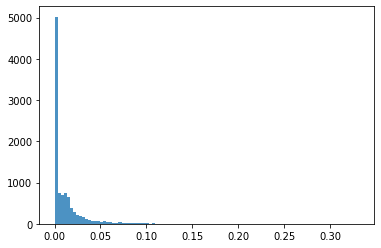

In [72]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
plt.hist(c[0],bins=100,histtype="stepfilled", alpha=.8)

(array([5.02e+03, 5.28e+02, 5.55e+02, 5.14e+02, 5.53e+02, 5.26e+02,
        3.63e+02, 2.58e+02, 2.23e+02, 1.52e+02, 1.41e+02, 1.03e+02,
        1.08e+02, 8.80e+01, 8.50e+01, 6.40e+01, 6.10e+01, 6.50e+01,
        5.80e+01, 4.60e+01, 3.00e+01, 3.60e+01, 4.10e+01, 2.40e+01,
        3.10e+01, 1.90e+01, 3.00e+01, 2.70e+01, 1.20e+01, 2.40e+01,
        1.50e+01, 1.40e+01, 2.00e+01, 1.30e+01, 1.10e+01, 1.30e+01,
        1.60e+01, 5.00e+00, 9.00e+00, 1.00e+01, 3.00e+00, 4.00e+00,
        1.00e+01, 3.00e+00, 6.00e+00, 2.00e+00, 3.00e+00, 5.00e+00,
        4.00e+00, 1.00e+00, 3.00e+00, 4.00e+00, 2.00e+00, 3.00e+00,
        1.00e+00, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 1.00e+00,
        2.00e+00, 3.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 2.00e+00,
        2.00e+00, 2.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        2.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 

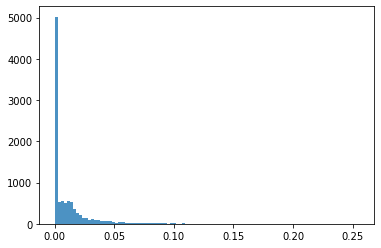

In [73]:
plt.hist(c[1],bins=100,histtype="stepfilled", alpha=.8)

(array([5.044e+03, 4.790e+02, 4.850e+02, 4.900e+02, 4.840e+02, 5.170e+02,
        3.590e+02, 2.810e+02, 2.070e+02, 1.630e+02, 1.570e+02, 1.440e+02,
        1.100e+02, 9.500e+01, 8.000e+01, 8.200e+01, 8.200e+01, 5.600e+01,
        6.000e+01, 4.100e+01, 5.200e+01, 5.200e+01, 4.100e+01, 3.300e+01,
        3.100e+01, 3.000e+01, 2.600e+01, 2.900e+01, 2.600e+01, 1.400e+01,
        1.100e+01, 1.600e+01, 2.200e+01, 1.500e+01, 2.200e+01, 1.100e+01,
        1.500e+01, 1.000e+01, 8.000e+00, 1.100e+01, 9.000e+00, 8.000e+00,
        1.200e+01, 9.000e+00, 4.000e+00, 4.000e+00, 2.000e+00, 3.000e+00,
        5.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 6.000e+00, 2.000e+00, 4.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

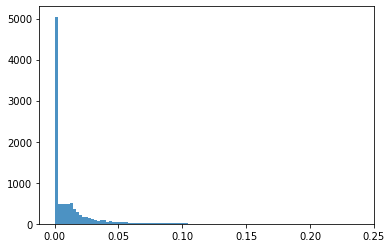

In [48]:
plt.hist(c[6],bins=100,histtype="stepfilled", alpha=.8)

In [105]:
number0=0
print(number0)
for item in range(0,9999):
    if ((c[0][item]>0.24)&(c[0][item]<0.25)):
        number0=number0+1
print(number0)

0
2


In [106]:
list=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
import random
nums=0
numbers=0
for j in range(0,9999):
    nums=random.choice(list)#生成随机整数
    if nums==0:
        numbers=numbers+1;
    elif((c[nums][j]>0.24)&(c[nums][j]<0.25)):
        numbers=numbers+1
print(numbers)

609


16个PE参与空间随机化，木马触发概率为6.33%

In [112]:
nums1=0
numbers1=0
zero_num=0
for j in range(0,9999):
    nums1=random.randint(0,31)#生成随机整数
    if nums1==0:
        zero_num=zero_num+1;
    elif((c[nums1][j]>0.24)&(c[nums1][j]<0.25)):
        numbers1=numbers1+1
numbers1=numbers1+zero_num
print(zero_num)
print(numbers1)

279
280


32个PE参与空间随机化，木马触发概率为2.8%

In [108]:
nums2=0
numbers2=0
zero_num2=0
for j in range(0,9999):
    nums2=random.randint(0,63)#生成随机整数
    if nums2==0:
        zero_num2=zero_num2+1;
    elif((c[nums2][j]>0.24)&(c[nums2][j]<0.25)):
        numbers2=numbers2+1
numbers2=numbers2+zero_num2
print(zero_num2)
print(numbers2)

139
178


64个PE参与空间随机化，木马触发概率为1.78%

In [109]:
nums3=0
numbers3=0
zero_num3=0
for j in range(0,9999):
    nums3=random.randint(0,47)#生成随机整数
    if nums3==0:
        zero_num3=zero_num3+1;
    elif((c[nums3][j]>0.24)&(c[nums3][j]<0.25)):
        numbers3=numbers3+1
numbers3=numbers3+zero_num3
print(zero_num3)
print(numbers3)

185
212


48个PE参与空间随机化，木马触发概率为2.12%

In [113]:
print(c[0])

[0.         0.02623269 0.         ... 0.00319798 0.01253274 0.        ]
